## Observations and Insights 

In [223]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [224]:
# Checking the number of mice.
list_of_unique_mice = study_data_complete["Mouse ID"].unique()

length_of_unique_mice_list = len(list_of_unique_mice)
length_of_unique_mice_list

249

In [225]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [226]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete[study_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [227]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = study_data_complete[study_data_complete["Mouse ID"]!="g989"]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [228]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_mouse_data)
number_of_mice

1880

## Summary Statistics

In [229]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = clean_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = clean_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":standard_deviation,
    "Standard Error": standard_error,
})
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [230]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_aggregate = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

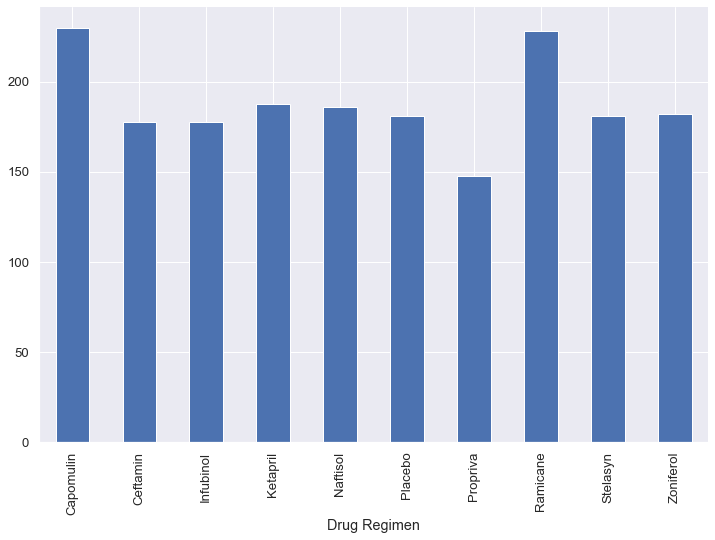

In [231]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_in_treatment = clean_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_in_treatment.plot(kind = "bar", x="Drug Regimen", y=mice_in_treatment)
mice_in_treatment

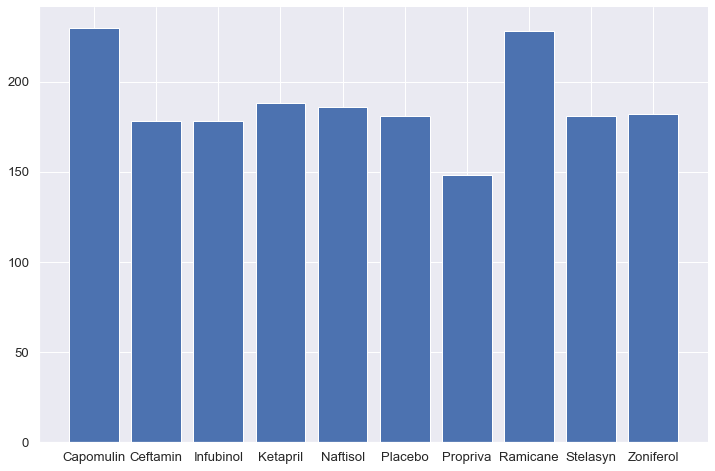

In [232]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice_in_treatment.index.values, mice_in_treatment.values);


Sex
Female    922
Male      958
Name: Sex, dtype: int64

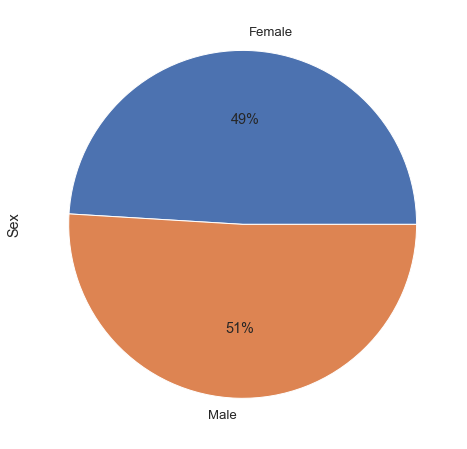

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution_female_male = clean_mouse_data.groupby(["Sex"])["Sex"].count()
distribution_female_male.plot(kind = "pie", autopct="%1.f%%")
distribution_female_male

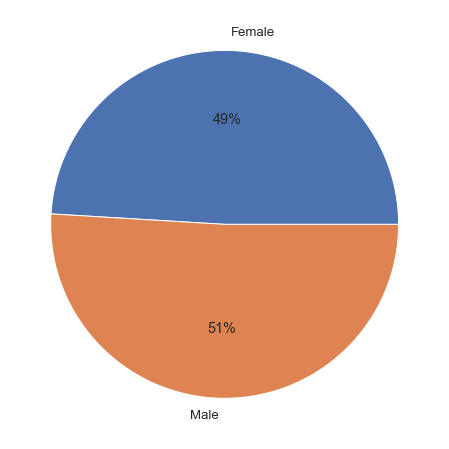

In [234]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution_female_male.values, labels=distribution_female_male.index.values, autopct="%1.f%%");


## Quartiles, Outliers and Boxplots

In [235]:
# cap_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
# ram_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Ramicane",:]
# inf_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Infubinol",:]
# cef_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Ceftamin",:]

# cap_max = cap_df.groupby("Mouse ID").max()["Timepoint"]
# ram_max = ram_df.groupby("Mouse ID").max()["Timepoint"]
# inf_max = inf_df.groupby("Mouse ID").max()["Timepoint"]
# cef_max = cef_df.groupby("Mouse ID").max()["Timepoint"]

# cap_max_df = pd.DataFrame(cap_max)
# ram_max_df = pd.DataFrame(ram_max)
# inf_max_df = pd.DataFrame(inf_max)
# cef_max_df = pd.DataFrame(cef_max)

In [236]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()
timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [237]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_df = pd.merge(clean_mouse_data, timepoint, how = "inner", on = ["Mouse ID", "Timepoint"])
vol_df["Drug Regimen"].value_counts()

Capomulin    25
Ketapril     25
Naftisol     25
Infubinol    25
Ramicane     25
Zoniferol    25
Placebo      25
Ceftamin     25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [238]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
    
# tumor_vol

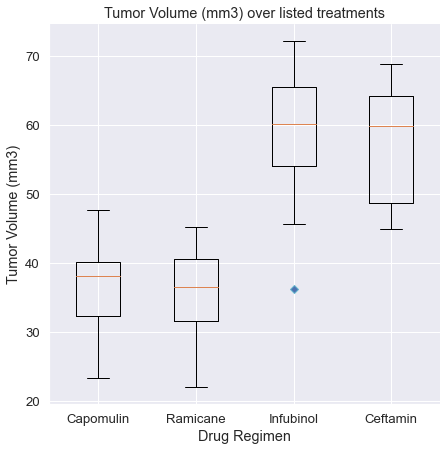

In [239]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b", marker = "D", markeredgecolor = "c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops = blue_dot)
ax1.set_title("Tumor Volume (mm3) over listed treatments")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks = range(1,len(list_of_drugs) + 1),ticklabels = list_of_drugs);

## Line and Scatter Plots

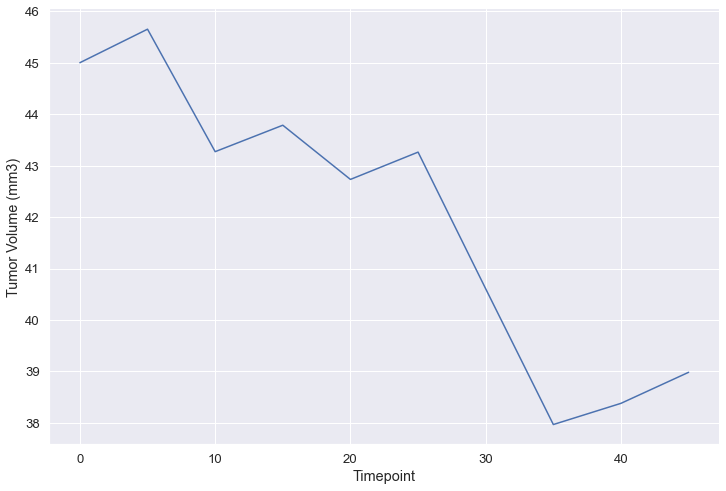

In [240]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treated = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_treated.loc[clean_mouse_data["Mouse ID"] == "b128"]
x = mouse_id["Timepoint"]
y = mouse_id["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y);

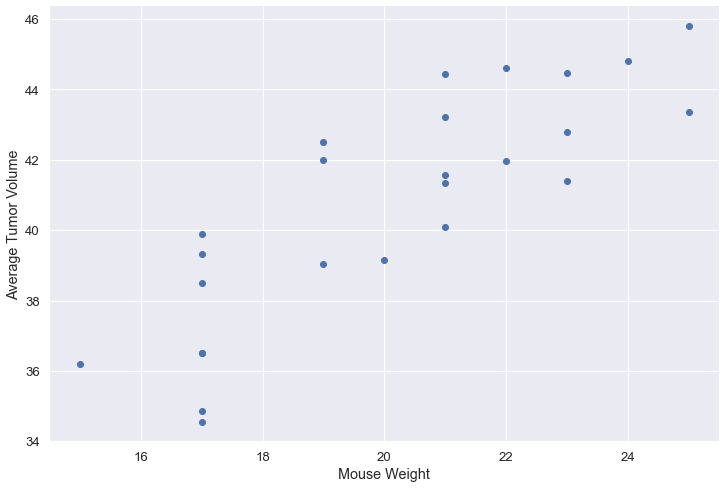

In [241]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = capomulin_treated.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(x,y);

## Correlation and Regression

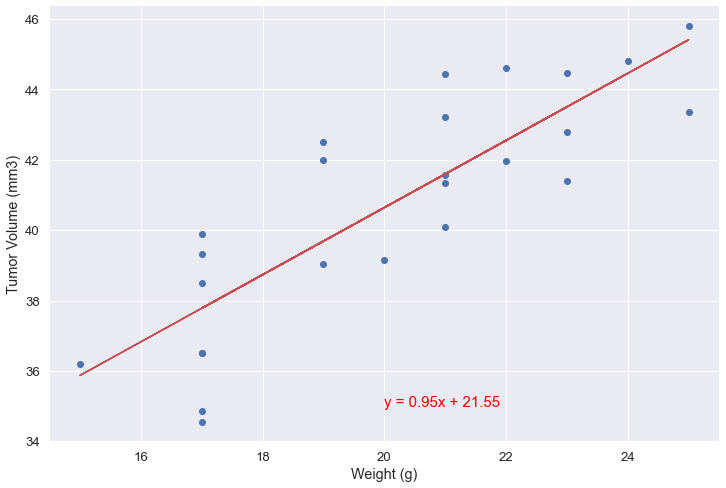

In [242]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
correlation = round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y);
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (20,35), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()